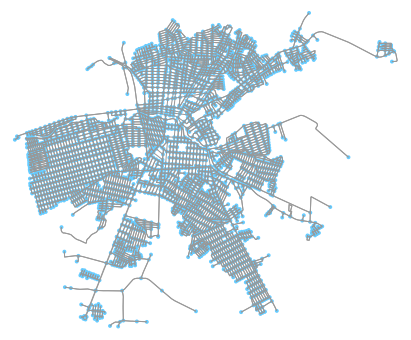

Wall time: 5.32 s


<Figure size 432x288 with 0 Axes>

In [50]:
%%time
import numpy as np
import osmnx as ox
from shapely.geometry import Polygon
from shapely import wkt
import networkx as nx
import pandas
import geopandas
from sklearn.neighbors import KDTree
import folium
import matplotlib.pyplot as plt
import collections
from osgeo import ogr
import matplotlib.pyplot as plt
import operator
%matplotlib inline
ciudad='Milagro'
wkt1 = "POLYGON ((-79.621810  -2.133177, -79.609450 -2.169543,   -79.571857 -2.166113,  -79.542846 -2.109332,  -79.592971 -2.107102,-79.621810  -2.133177))"

poly1 = ogr.CreateGeometryFromWkt(wkt1)
polygon = wkt.loads( poly1.ExportToWkt() )
graph = G2 = ox.graph_from_polygon(polygon , network_type='drive')
type(graph)
fig, ax = ox.plot_graph(graph)

plt.savefig(ciudad + '_HospR.png', dpi=400)

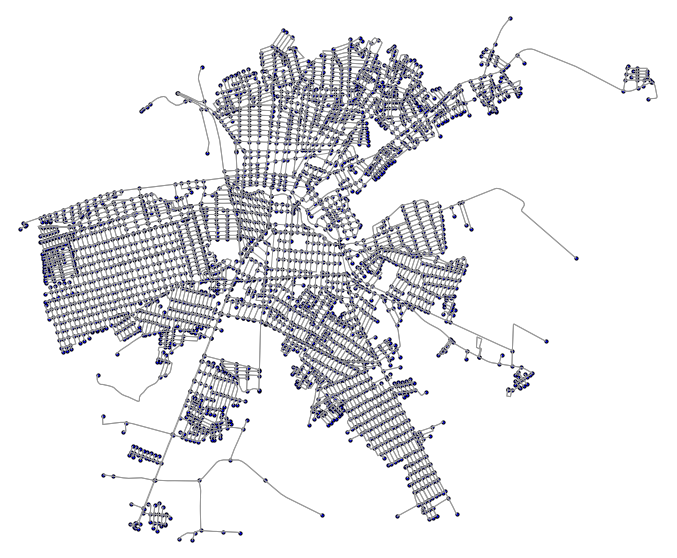

In [16]:
fig, ax = ox.plot_graph(graph, fig_height=10, fig_width=14, node_size=10, node_color='b', node_edgecolor='k')

In [8]:
v=len(G2)
e=G2.number_of_edges()
p=e/v
f=e-v+1
M=f/(2*v-5)

culdesacs = [key for key, value in G2.graph['streets_per_node'].items() if value==1]
nc = ['r' if node in culdesacs else 'none' for node in G2.nodes()]
v1=len(culdesacs)

culdesacs = [key for key, value in G2.graph['streets_per_node'].items() if value==3]
nc = ['r' if node in culdesacs else 'none' for node in G2.nodes()]
v3=len(culdesacs)

culdesacs = [key for key, value in G2.graph['streets_per_node'].items() if value==4]
nc = ['r' if node in culdesacs else 'none' for node in G2.nodes()]
v4=len(culdesacs)

culdesacs = [key for key, value in G2.graph['streets_per_node'].items() if value==5]
nc = ['r' if node in culdesacs else 'none' for node in G2.nodes()]
v5=len(culdesacs)

culdesacs = [key for key, value in G2.graph['streets_per_node'].items() if value==6]
nc = ['r' if node in culdesacs else 'none' for node in G2.nodes()]
v6=len(culdesacs)

rv=(v1+v3)/(v1+v3+v4+v5+v6)
p=e/v


print ('The vertices and edges of Milagro is:', v, '', e)
print ('The connectivity of Milagro is:', p)
print ('Milagro mesh is:', M)
print ('The organic of Milagro is:', rv)

The vertices and edges of Milagro is: 3625  10935
The connectivity of Milagro is: 3.016551724137931
Milagro mesh is: 1.0091097308488612
The organic of Milagro is: 0.5318796577422026


In [13]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)

In [29]:
Gb=nx.DiGraph(G2)
#edge_Betweenness = nx.betweenness_centrality(nx.line_graph(Gb))
edge_Betweenness = nx.betweenness_centrality(Gb)

print('Listo')

Listo


Muestra la Centralidad de Intermediacion de las calles de Milagro


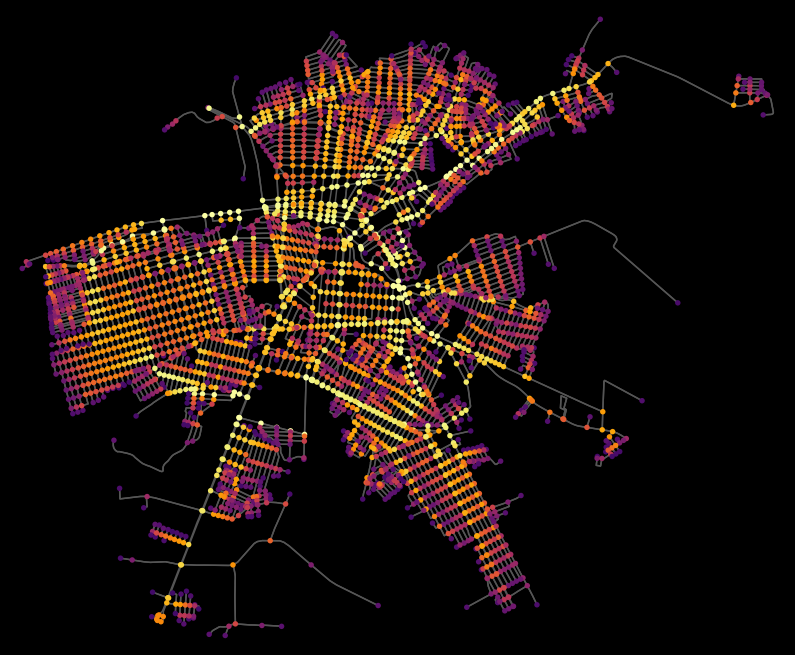

In [35]:
print('Muestra la Centralidad de Intermediacion de las calles de ' + ciudad)
df = pd.DataFrame(data=pd.Series(edge_Betweenness).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G2.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G2, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, fig_height=12, fig_width=14)

Introduce un numero: 20
los n nodos de mayor interconectividad


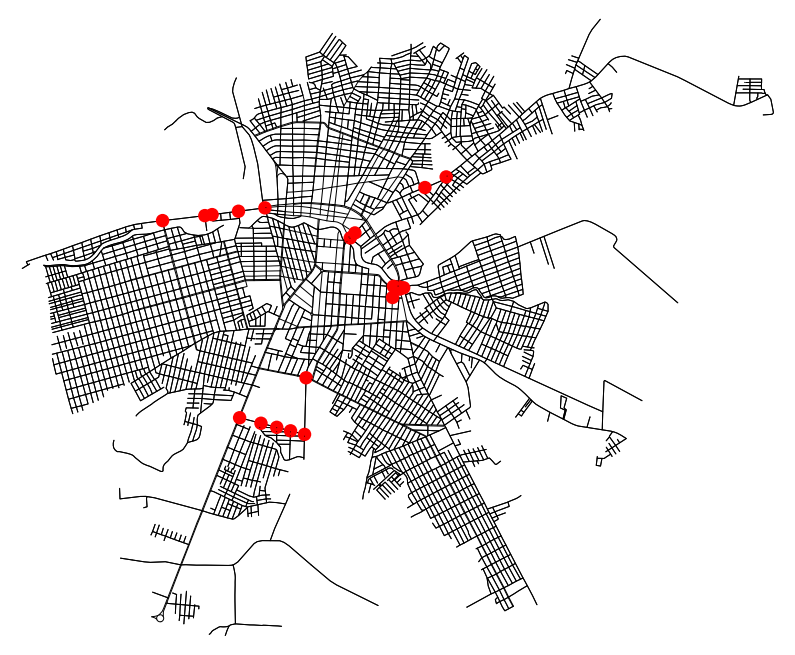

In [51]:
import operator
numero = int(input('Introduce un numero: '))
sorted_x = sorted(edge_Betweenness.items(), key=operator.itemgetter(1), reverse=True)
#Ampliar el tamaño

culdesacs=[]
for x in range(numero):
    [v,e]=sorted_x[x]
    culdesacs.append(v)

ox.config(log_file=True, log_console=True, use_cache=True)
n=len(G2)
e=G2.number_of_edges()
pi=e/n

nc = ['r' if node in culdesacs else 'none' for node in G2.nodes()]
print('los n nodos de mayor interconectividad')

ns = [180 if node in culdesacs else 1 for node in G2.nodes()]

fig, ax = ox.plot_graph(G2, node_size=ns, node_color=nc, node_zorder=2, edge_color='k',
                           fig_height=12, fig_width=14)
#GUARDAR

In [42]:
type(Gb)

networkx.classes.digraph.DiGraph

In [36]:
edge_centrality = nx.closeness_centrality(Gb)
print('Listo')

Listo


Muestra la Centralidad de cercania de las calles de Milagro


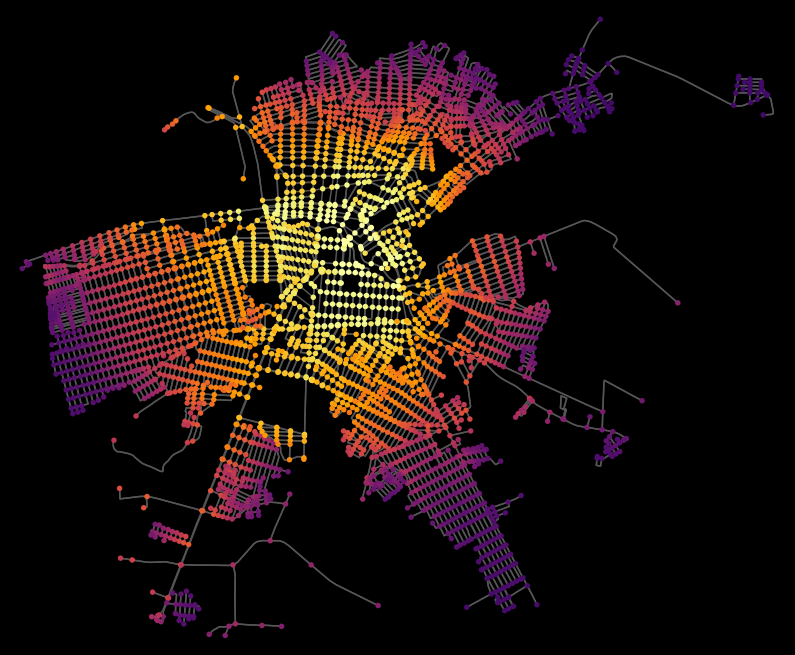

In [52]:
print('Muestra la Centralidad de cercania de las calles de ' + ciudad)
df = pd.DataFrame(data=pd.Series(edge_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G2.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G2, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, fig_height=12, fig_width=14)

Introduce un numero: 20
los n nodos de mayor Centralidad Cercana


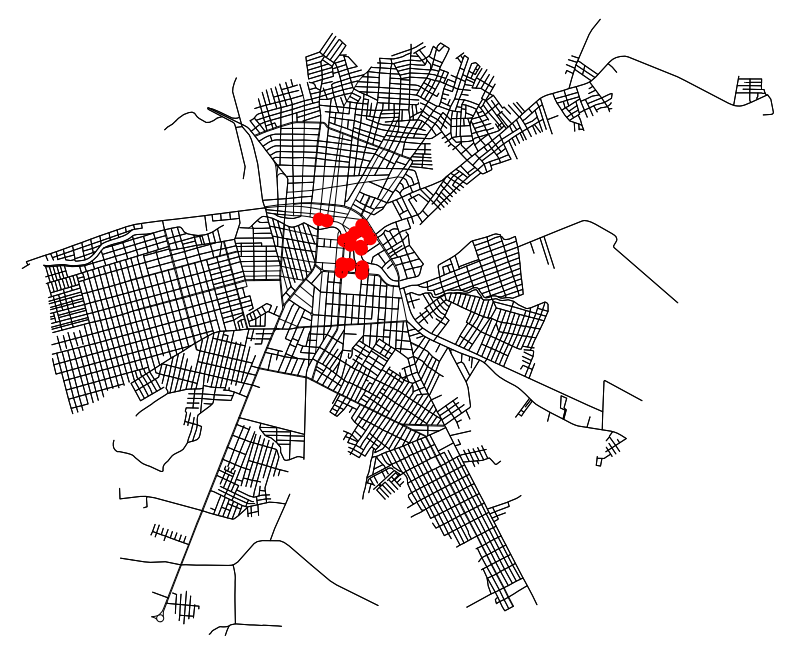

In [53]:
import operator
numero = int(input('Introduce un numero: '))
sorted_x = sorted(edge_centrality .items(), key=operator.itemgetter(1), reverse=True)
#Ampliar el tamaño

culdesacs=[]
for x in range(numero):
    [v,e]=sorted_x[x]
    culdesacs.append(v)

ox.config(log_file=True, log_console=True, use_cache=True)
n=len(G2)
e=G2.number_of_edges()
pi=e/n

nc = ['r' if node in culdesacs else 'none' for node in G2.nodes()]
print('los n nodos de mayor Centralidad Cercana')

ns = [180 if node in culdesacs else 1 for node in G2.nodes()]

fig, ax = ox.plot_graph(G2, node_size=ns, node_color=nc, node_zorder=2, edge_color='k',
                           fig_height=12, fig_width=14)
#GUARDAR

In [38]:
# sur y oeste -2.910204, -79.006991 norte y este -2.880195, -78.976481
import osmnx as ox  
north, south, east, west = -2.135472,  -2.165920, -79.567110 ,  -79.605777
G2 = ox.graph_from_bbox(north, south, east, west, network_type='drive')
G22=ox.graph_from_bbox(north, south, east, west, network_type='drive')  
print('Listo')


Listo


In [39]:
import WazeRouteCalculator
import time
region = 'EU'

from_address = '-2.155113, -79.578612'
to_address = '-2.149538, -79.602215'

route = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address, region, log_lvl=None)
route_time, route_distance = route.calc_route_info()
h=int(route_time/60)
b = abs(route_time/60) - abs(int(route_time/60))
m=int(b*60)
print('R: Sector Estadio Serrano Aguilar-Aeropuerto Cuenca, Coordenadas Origen: ',from_address,' Destino: ', to_address )
print('El tiempo estimado es: ', h, 'horas ', m, ' minuntos')
print('La distancia estimada es: ', route_distance, 'Km')
archivo=open("Lista_Waze3.CSV","a")
archivo.write('R:SanJuanH')
archivo.write(",")
archivo.write(time.strftime("%H:%M:%S"))
archivo.write(",")
archivo.write(str(h))
archivo.write(",")
archivo.write(str(m))
archivo.write(",")
archivo.write(str(route_distance))
archivo.write(",")
archivo.write("\n")
print('Hora calculada>> ', time.strftime("%H:%M:%S"))

R: Sector Estadio Serrano Aguilar-Aeropuerto Cuenca, Coordenadas Origen:  -2.155113, -79.578612  Destino:  -2.149538, -79.602215
El tiempo estimado es:  0 horas  7  minuntos
La distancia estimada es:  3.896 Km
Hora calculada>>  08:57:35


In [40]:
import networkx as nx
import numpy as np
import osmnx as ox
from sklearn.neighbors import KDTree
import folium
import matplotlib.pyplot as plt
print('O: UPCLAS PIÑAS - UNEMI *Sin Interrupcion')

ini1=ox.geocode(from_address)
des1=ox.geocode(to_address)
nodes, _ = ox.graph_to_gdfs(G2)
nodes.head()
tree = KDTree(nodes[['y', 'x']], metric='euclidean')
ini1_idx = tree.query([ini1], k=1, return_distance=False)[0]
des1_idx = tree.query([des1], k=1, return_distance=False)[0]
closest_node_to_ini1 = nodes.iloc[ini1_idx].index.values[0]
closest_node_to_des1 = nodes.iloc[des1_idx].index.values[0]

route = nx.shortest_path(G2, closest_node_to_ini1, closest_node_to_des1)
#route = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address, region, log_lvl=None)
#route_time, route_distance = route.calc_route_info()                              
print('listo')

O: UPCLAS PIÑAS - UNEMI *Sin Interrupcion
listo


Distancia >>  4.0 Km.


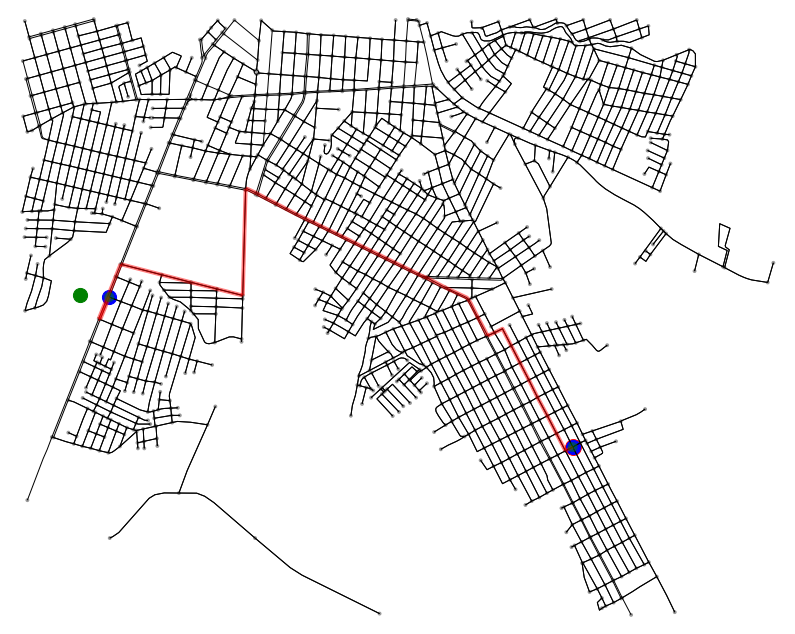

In [41]:
fig, ax = ox.plot_graph_route(G2, route, fig_height=16, 
                              fig_width=14, 
                              show=False, close=False, 
                              edge_color='black',
                              orig_dest_node_color='green',
                              route_color='red')

ax.scatter(ini1[1], ini1[0], c='red', s=250)
ax.scatter(des1[1], des1[0], c='green', s=200)


ax.scatter(G2.nodes[closest_node_to_ini1]['x'],
           G2.nodes[closest_node_to_ini1]['y'], 
           c='blue', s=200)
ax.scatter(G2.nodes[closest_node_to_des1]['x'],   
           G2.nodes[closest_node_to_des1]['y'], 
           c='blue', s=200)

#length = nx.shortest_path_length(G=G2, source=closest_node_to_ini1, target=closest_node_to_des1, weight='length')
length = nx.shortest_path_length(G=G2, source=closest_node_to_ini1, target=closest_node_to_des1, weight='length')
print('Distancia >> ', round(length/1000,2), 'Km.')
fig.savefig("RPiñasUNEMI.tiff", dpi=400, format="tiff")